In [4]:
# initialization
from qiskit import *
import numpy as np
from math import pi
# importing Qiskit
from qiskit import IBMQ, Aer,ClassicalRegister
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

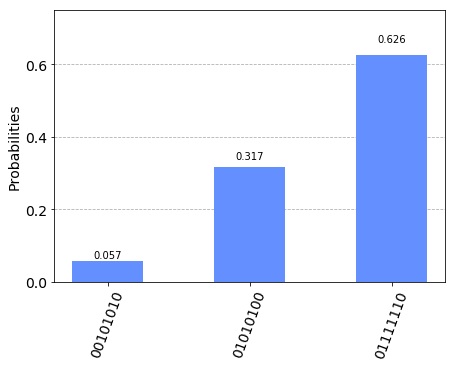

In [5]:
#my improved algorithm for specific case, given co-relation matrix A=diag(0 1 2 3)
#in this case q2 has higher value than q1
#perfect

#initialization (Improved)
qc_init=QuantumCircuit(8,8)
qc_init.x(3)
qc_init.ry(2.6,6)
qc_init.x(6)
qc_init.cx(6,5)
qc_init.x(6)
qc_init.cu3(1.96,0,0,6,5)
qc_init.x(5)
qc_init.ccx(6,5,4)
qc_init.ccx(6,5,3)
qc_init.x(5)
qc_init.ccx(6,5,4)
qc_init.barrier()
#qc_init.draw('mpl')

#------------------------------------------
#Phase Estimation (Improved)

qc_PE=QuantumCircuit(8,8)
qc_PE.barrier()
qc_PE.h(1)
qc_PE.h(2)

qc_PE.cz(1,6)
qc_PE.cu1(pi/2,1,5)

qc_PE.cz(2,5)

qc_PE.swap(1,2)
qc_PE.h(1)
qc_PE.cu1(-pi/2,1,2)
qc_PE.h(2)
qc_PE.barrier()
#qc_PE.draw('mpl')

#------------------------------------------
#thresholding (no change)

qc_CU=QuantumCircuit(8,8)
qc_CU.x(2)
qc_CU.ccx(1,2,7)
qc_CU.x(2)
qc_CU.cx(7,1)
qc_CU.barrier()
#qc_CU.draw('mpl')

#-------------------------------------

#threshold tau=1.8, meaning eigenvalues greater than tau are as it is and less than tau are 00
#controlled rotation

qc_CR=QuantumCircuit(8,8)
qc_CR.x(1)
qc_CR.x(2)
qc_CR.ccx(1,2,0)
qc_CR.x(1)
qc_CR.x(2)
qc_CR.x(0)
qc_CR.barrier()
#qc_CR.draw('mpl')

#-----------------------------------
#assembling
qc=qc_init+qc_PE#+qc_CU+qc_CR+qc_CU.inverse()+qc_PE.inverse()
qc.draw('mpl')
for i in range(8):
    qc.measure(i,i)
#qc.draw('mpl') 


#-------------------------------------
#measurement on qasm simulator

qasm_sim = Aer.get_backend('qasm_simulator')
shots = 2048
qobj = assemble(qc, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)